## Linear Regression from scratch

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
data.head()

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [ ]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array
x = data[["gpa", "years_of_experience"]].values   # (m, n)
y = data["salary"].values                       # (m,)

print("check work:") # I will be adding print statements to check my work, ignore those please
print("x:", x.shape)
print("y:", y.shape)

check work:
x: (25, 2)
y: (25,)


In [4]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = x.shape[0]
n = x.shape[1]

print("check:")
print(m)
print(n)

check:
25
2


In [5]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
y = y.reshape(m, 1)

print("check:")
print(y.shape)

check:
(25, 1)


In [6]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(x)

print("check:")
print(x[:5])

check:
[[70.   1. ]
 [80.   2. ]
 [65.   2. ]
 [70.   2.5]
 [65.   2.7]]


In [7]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(X)

print("check:")
print(X[:5])


check:
[[1.      0.3125  0.     ]
 [1.      0.625   0.125  ]
 [1.      0.15625 0.125  ]
 [1.      0.3125  0.1875 ]
 [1.      0.15625 0.2125 ]]


In [8]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)

print("X:", X.shape)
print("y:", y.shape)

X: (25, 3)
y: (25, 1)


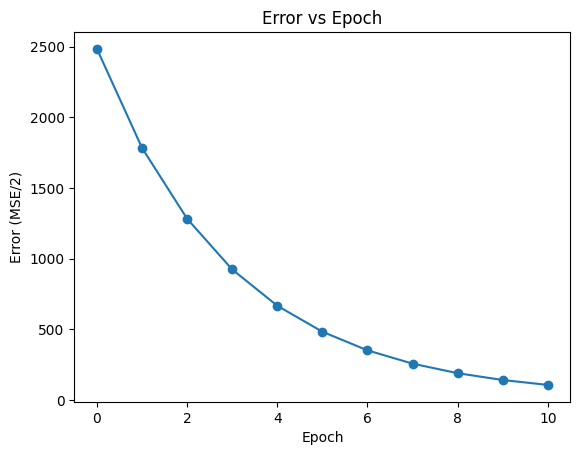

Final theta:
 [[37.20536484]
 [18.41593008]
 [21.12027021]]


In [9]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.random.randn(n + 1, 1)

E = [] # list to store errors at each epoch
# compute error for initial theta and append to E
y_pred = X.dot(theta)
error = np.mean((y_pred - y) ** 2) / 2
E.append(error)

# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
for epoch in range(n_epochs):
    gradients = X.T.dot(y_pred - y) / m
    theta = theta - eta * gradients
    y_pred = X.dot(theta)
    error = np.mean((y_pred - y) ** 2) / 2
    E.append(error)

# plot error vs epoch
import matplotlib.pyplot as plt
plt.plot(range(len(E)), E, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Error (MSE/2)")
plt.title("Error vs Epoch")
plt.show()

# print final theta
print("Final theta:\n", theta)

In [10]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
x = np.array([[70, 3]])
# scale features using the same scaler we used earlier
x = scaler.transform(x)
# insert dummy feature using dummy feature function
x = add_dummy_feature(x)
# Predict salary of x
y_pred_x = x.dot(theta)
print("Predicted salary:", y_pred_x[0,0])

Predicted salary: 48.24041054522389


In [11]:
# Let's compare with scikit-learn's SGDRegressor
from sklearn.linear_model import SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, random_state=42)

In [12]:
# predict salary of x using sgd
y_pred_sgd = sgd_reg.predict(x)
print("Predicted salary with SGDRegressor this time:", y_pred_sgd[0])

Predicted salary with SGDRegressor this time: 59.444338469177936


In [13]:
# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
# create X_poly using fit_transform
X_poly = poly.fit_transform(X)
# create x_poly using transform
x_poly = poly.transform(x)
# fit the data using SGDRegressor
sgd_reg_poly = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)
sgd_reg_poly.fit(X_poly, y.ravel())
# predict salary of x using sgd
y_pred_poly = sgd_reg_poly.predict(x_poly)
print("Predicted salary with PolynomialFeatures:", y_pred_poly[0])

Predicted salary with PolynomialFeatures: 59.91812649024751
